In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets,metrics,svm
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

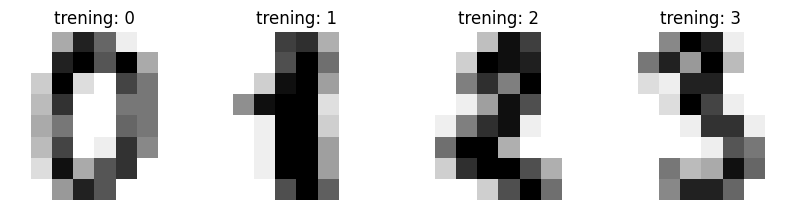

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f'trening: {label}')

In [4]:
n_samples = len(digits.images)
n_samples

1797

In [5]:
#preprocessing
data = digits.images.reshape(n_samples,-1)
data.shape

(1797, 64)

In [6]:
data[0]

array([ 0., 0., 5., 13., 9., 1., 0., 0., 0., 0., 13., 15., 10.,
 15., 5., 0., 0., 3., 15., 2., 0., 11., 8., 0., 0., 4.,
 12., 0., 0., 8., 8., 0., 0., 5., 8., 0., 0., 9., 8.,
 0., 0., 4., 11., 0., 1., 12., 7., 0., 0., 2., 14., 5.,
 10., 12., 0., 0., 0., 0., 6., 13., 10., 0., 0., 0.])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)

In [13]:
#model
clf = svm.SVC(gamma=0.001)

In [14]:
clf.fit(X_train,y_train)

SVC(gamma=0.001) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC ? Documentation for SVC i Fitted SVC(gamma=0.001)

In [17]:
#predykcja za pomocą modelu
predicted = clf.predict(X_test)

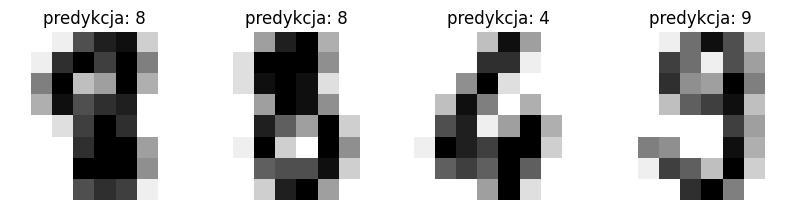

In [18]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f'predykcja: {prediction}')

In [19]:
#ocena modelu
print(f"raport klasyfikacji dla klasyfikatora {clf} -> \n{metrics.classification_report(y_test,predicted)}\n")

raport klasyfikacji dla klasyfikatora SVC(gamma=0.001) -> 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Macierz pomyłek')

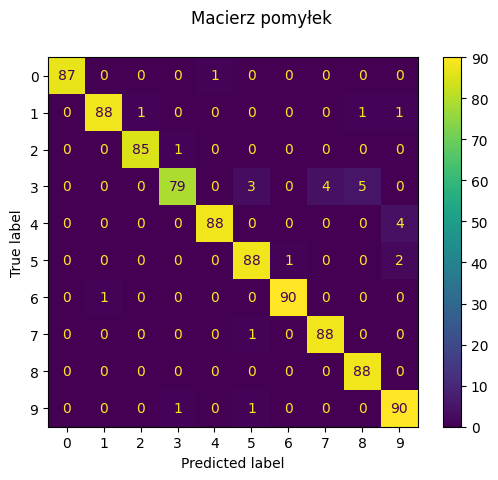

In [21]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek")